In [2]:
ENV["GKS_ENCODING"] = "utf-8"
using Plots
include("src/ladderDGA_Julia.jl");

Inputs Read. Starting Computation                                          
Calculating bubble: 380.486584 seconds (8.66 G allocations: 243.865 GiB, 20.44% gc time)
Calculating naiive χ and γ in the charge channel: 146.593195 seconds (1.84 M allocations: 14.606 GiB, 1.52% gc time)
Calculating naiive χ and γ in the spin channel:  87.369268 seconds (833.90 k allocations: 14.556 GiB, 1.91% gc time)
Calculating λ correction in the charge channel: aa
  0.303418 seconds (677.58 k allocations: 46.016 MiB, 4.68% gc time)
Calculating λ correction in the spin channel: aa
  0.057633 seconds (95 allocations: 17.134 MiB, 10.58% gc time)
Calculating naiive Σ ladder:  95.276669 seconds (201.49 k allocations: 44.612 MiB, 0.01% gc time)
Calculating χ and γ in the charge channel:  81.707063 seconds (1.99 M allocations: 14.814 GiB, 2.13% gc time)
Calculating χ and γ in the spin channel: 211.371453 seconds (1.28 M allocations: 14.779 GiB, 0.81% gc time)
TODO: replace chisp by chisp_lambda


# Improved Sums

## Motivation

Our goal is to find a good surrogate for the sum over infinitely many Matsubara frequencies, i.e. $\lim_{N \rightarrow \infty}\sum_{i\nu_{-N}}^{i\nu_{N}} f(\nu) \longrightarrow \lim_{N \rightarrow \infty} \text{S}_N[f(\nu)]$.
This operator $\text{S}$ can be defNined in different ways.
Here we will test two different approaches.

### Extrapolation approach

In order to quantify the error made by the finite approximation of the infinite sum, we first construct the following function:
$$
    g_\text{N} = \sum_{x = i \nu_{-N}}^{i \nu_{N}} f(x)
$$
We now want to extract the true limit of $N \rightarrow \infty$ from $g_\text{N}$.
For any finite summation we assume, that there error Terms fall of as $\sum_{i=1}^k \frac{c_i}{(i\nu_N)^i}$ with coefficients $c_i \in \mathbb{C}$.
We can therefore assume that the finite approximation of $g_\text{N}$ has a tail of the form 
$$
    S(j) = \lim_{N \rightarrow \infty} S_N(j) = \lim_{N \rightarrow \infty} \sum_{i=0}^N \frac{c_i}{(j)^i}
$$
It is clear that for $N \rightarrow \infty$, only $c_0$ survives and all other terms are artifacts of the finite approximation.
By fitting $S_N$ to the numerical data of $\tilde{f}_\text{N}$ we can determine the coefficients and extract the true value of the sum
$$
    \lim_{N \rightarrow \infty} g_\text{N} = c_0
$$


### Analytic tail approach

In cases in which we know the true tail of a function: $\lim_{n \rightarrow \infty} f(i \nu_n) = \sum_{i = 1}^N \frac{c_i}{i \nu_n}$ we can use this knowledge to improve convergence of a sum.
Note that $c_0 = 0$ in order for the sum to converge in the first place.
We write
\begin{align}
    \sum_{n} f(i \nu_n) & = \sum_{n} \left(f(i \nu_n) - \sum_{j = 1}^N \frac{c_j}{i \nu_n}\right) + \sum_{n}\sum_{j = 1}^N \frac{c_j}{i \nu_n}
\end{align}
The $\sum_{n}\sum_{j = 1}^N \frac{c_j}{i \nu_n}$ is analytically 

#### Fit to kinetic energy


We now use that the leading order of the $\chi$ tail is known to be $\frac{E_\text{kin}}{(i \omega_n)^2}$ (TODO: cite!).
This tail coefficient is subtracted, analytically summend and only the remaining higher order terms have to be fitted to real data.
\begin{align}
    \sum_{n= 1}^\infty \frac{2 E_\text{kin}}{(i \omega_n)^2}
     & = \sum_{n= 1}^\infty \frac{2 E_\text{kin}}{\left(i \frac{(2n) \pi}{\beta}\right)^2} \\
     & = \frac{ E_\text{kin} \beta^2}{- 2 \pi^2} \sum_{n= 1}^\infty \frac{1}{\left( n\right)^2} \\
     & = - \frac{E_\text{kin} \beta^2}{2 \pi^2} \left(
       \frac{\pi^2}{6}
     \right) \\
     & = - \frac{E_\text{kin} \beta^2}{12} 
\end{align}
This can be used to reduce the number of tail coefficients we need to fit:
\begin{align}
    \frac{1}{\beta} \sum_{n= -\infty}^\infty \chi (i \omega_n) 
           & =  \frac{\chi (i \omega_0)}{\beta} + \frac{1}{\beta}  \sum_{n= \mathbb{N} \setminus \{ 0\}} \left( \chi (i \omega_n) - \frac{2 E_\text{kin}}{(i \omega_n)^2}  \right) +  \frac{1}{\beta} \sum_{n=\mathbb{N} \setminus \{ 0\} } \frac{2 E_\text{kin}}{(i \omega_n)^2} \\
        & \stackrel{\text{h.f.}}{=} \frac{\chi (i \omega_0)}{\beta} + \frac{2}{\beta}  \sum_{n= 1 }^\infty \left( \chi (i \omega_n) - \frac{2 E_\text{kin}}{(i \omega_n)^2}  \right) -  \frac{E_\text{kin} \beta}{6} 
\end{align}


#### Kinetic energy from ED

We compute $E_\text{kin}$ from ED using 
\begin{align}
    E_\text{kin} & = \frac{1}{\beta} \sum_{k, n} \epsilon_k G(i  \nu_n, k) 
    = \frac{1}{\beta} \sum_{n} \Delta (i \nu_n) G_\text{IMP}(i \nu_n)\\
    \Delta(i \nu_n) & = \sum_l \frac{V_l^2}{i\nu_n - \epsilon_l}
\end{align}
For the $\nu_n$ sum we use the knowledge of the full tail:
\begin{align}
    \sum_{n=0}^\infty \Delta (i \nu_n) G_\text{IMP}(i \nu_n) = 
    \sum_{n} \left( \Delta (i \nu_n) G_\text{IMP}(i \nu_n) - \sum_k \frac{V_k^2}{(i\nu_n)^2} \right) + \sum_{n,k} \frac{V_k^2}{(i\nu_n)^2} 
\end{align}

Bath parameters are read from ``hubb.andpar`` and the impurity Greens function from ``gm_wim``


## Method for the analytical lsq fit of frequency sums 

It turns out, that the fitting procedure for the numerical data above is quite unstable. However, it is possible to compute the coefficients for the least squares fit (lsq fit) analytically i.e. with arbitrary precision. This approach will be discussed here. 
Our $n$ datapoints for the fit are given by $g_n$.

In order to minimize $\text{LSQ}(g_n) = \sum_{j=\nu\text{max}_\text{min}}^{\nu\text{max}_\text{max}} \left(S_n(j) - \left(g_{n}\right)_j\right)^2$
with the tail function for data points $g_j$
\begin{equation}
    S_n(j) = \sum_{k = 0}^n \frac{c_{k}}{j^k}
\end{equation}
$k, l$ are a running index for all elements of the set of coefficients $C$ with elements denoted by $c$.

We first construct 
$M_{kl} = \sum_{j=\nu\text{max}_\text{min}}^{\nu\text{max}_\text{max}} \frac{1}{j^k j^{l}}$
(derivation: minimize least squares sum analytically) and then for the $n$-th set of $j$ datapoints $\left(g_{n}\right)_j$:
\begin{equation}
\left(b_{n}\right)_{l} = \sum_{j=\nu\text{max}_\text{min}}^{\nu\text{max}_\text{max}} \frac{\left(g_{n}\right)_j}{j^d}
\end{equation}

We can then obtain the fit-coefficients $c_n$ of the $n$-th data point by solving $M c_n = b_n$

# Comparison $\chi_\text{Impurity}$ with  $\chi_\text{numerical}$

## general $\chi_{\sigma \sigma'}$ sums
 - Compute the naive sum $\chi^{\omega}_{\sigma \sigma', \text{naive}}$ as $\frac{1}{\beta^2} \sum_{\nu \nu'}\chi^{\omega \nu \nu'}_{\sigma \sigma'}$
 - Compute the fitted sum $\chi^{\omega}_{\sigma \sigma', \text{fit}}$ as $\frac{1}{\beta^2}  \text{FitSum}_{\nu \nu'}(\chi^{\omega \nu \nu'}_{\sigma \sigma'})$

In [31]:
# load asymptotic data
asympt_vars = load(env.asymptVars);
χchAsympt_in = asympt_vars["chi_ch_asympt"];
χspAsympt_in = asympt_vars["chi_sp_asympt"];
χchED_in = χDMFTch#asympt_vars["chi_ch_ED"];
χspED_in = χDMFTsp#asympt_vars["chi_sp_ED"];

# naive:
χchED_ω_naive = sum(χchED_in,dims=[2,3])[:,1,1];
χspED_ω_naive = sum(χspED_in,dims=[2,3])[:,1,1];
χchED_ω_naive = vcat(reverse(χchED_ω_naive[2:end]), χchED_ω_naive)
χspED_ω_naive = vcat(reverse(χspED_ω_naive[2:end]), χspED_ω_naive)

# fit preparation:
nc = [0,1,2,3]
νmax_end   = floor(Int64,size(χchED_in,2)/2)
start = ceil(Int64, (2/4)*νmax_end)
W = build_weights(start, νmax_end, nc)
println("Building fit matrix for ν frequencies from ", start, " to ", νmax_end, " with ", length(nc), " coeffcients")

# fit
χchED_ω_fit = approx_full_sum(χchED_in, W, modelParams, [2,3], fast=false)/(modelParams.β^2);
χspED_ω_fit = approx_full_sum(χspED_in, W, modelParams, [2,3], fast=false)/(modelParams.β^2);


# ed
χchAsympt = χchAsympt_in[1:ceil(Int64,length(χchED_ω_naive)/2)]
χchAsympt = 2*vcat(reverse(χchAsympt[2:end]), χchAsympt)
χspAsympt = χspAsympt_in[1:ceil(Int64,length(χspED_ω_naive)/2)]
χspAsympt = 2*vcat(reverse(χspAsympt[2:end]), χspAsympt);

Building fit matrix for ν frequencies from 21 to 41 with 4 coeffcients


### Comparison plots

Range is >>extended<< instead of reduced in order to show boundary effects.

Usable range: 24:56. Reduction: 10.0%


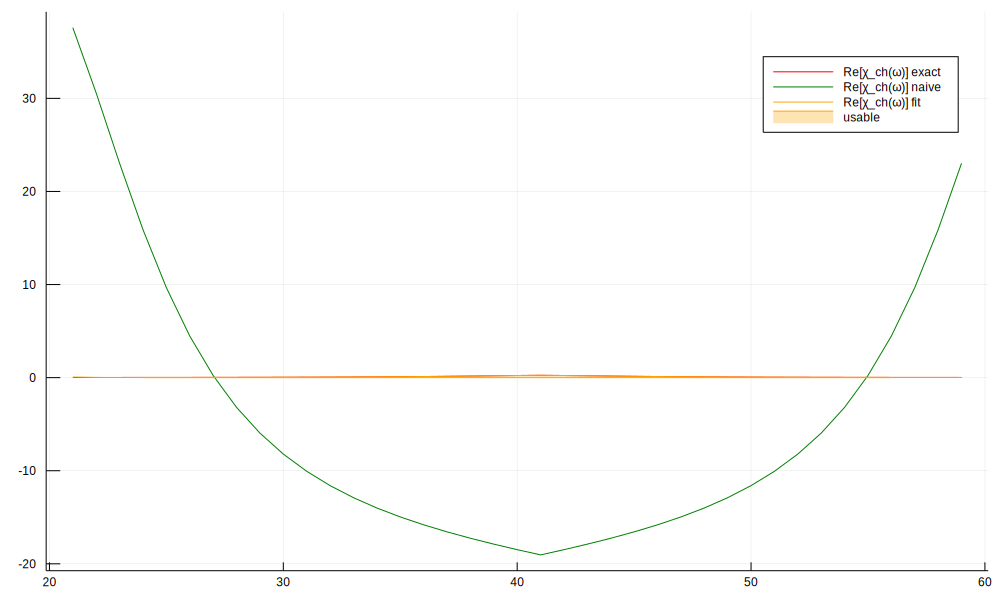

In [32]:
include("src/GFFit.jl")
reduction_prct_pl = -0.1
reduction_prct = 0.1
usable_ch_pl = find_usable_interval(real(χchED_ω_fit), reduce_range_prct=reduction_prct_pl)
usable_ch = find_usable_interval(real(χchED_ω_fit), reduce_range_prct=reduction_prct)
fit_y = real(χchED_ω_fit[usable_ch_pl])
lusable_pl = length(usable_ch_pl)
naive_y = real(χchED_ω_naive[ceil(Int64,length(χchED_ω_naive)/2-lusable_pl/2):floor(Int64,length(χchED_ω_naive)/2+lusable_pl/2)-1])
asym_y = real(χchAsympt[ceil(Int64,length(χchAsympt)/2-lusable_pl/2):floor(Int64,length(χchAsympt)/2+lusable_pl/2)-1])
println("Usable range: ", usable_ch, ". Reduction: $(100*reduction_prct)%")
plot(usable_ch_pl, asym_y, label="Re[χ_ch(ω)] exact", c=:red, size=(1000,600))
plot!(usable_ch_pl, naive_y, label="Re[χ_ch(ω)] naive", c=:green)
plot!(usable_ch_pl, fit_y, label="Re[χ_ch(ω)] fit", c=:orange)
plot!(usable_ch, repeat([0], length(usable_ch)), fillrange=real(χchED_ω_fit[usable_ch]), fillalpha=0.3, c=:orange, label="usable")

Usable range: 17:63. Reduction: -30.0%


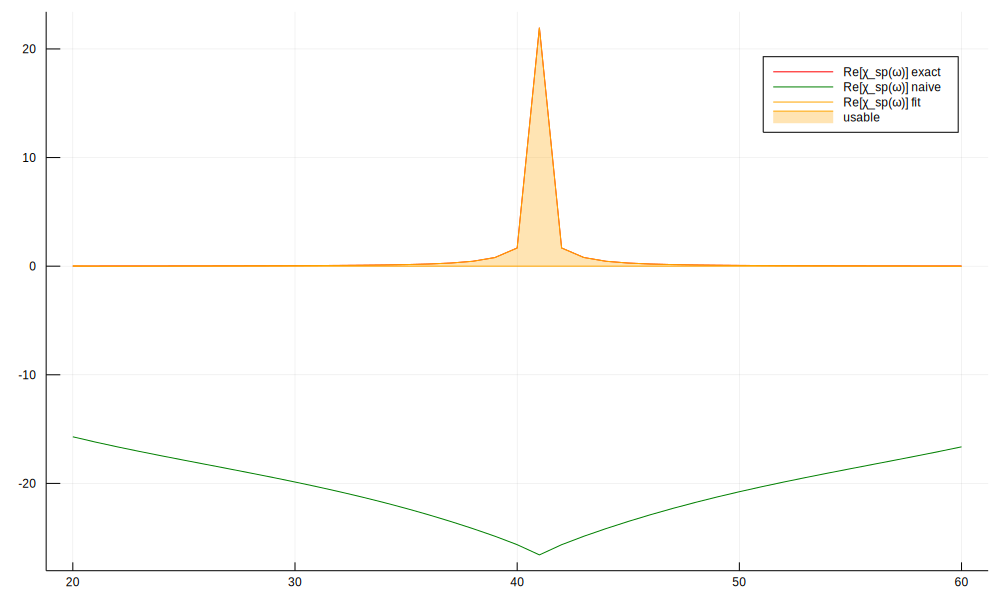

In [7]:
reduction_prct = -0.3
usable_sp_pl = find_usable_interval(real(χspED_ω_fit), reduce_range_prct=reduction_prct)
usable_sp = find_usable_interval(real(χspED_ω_fit), reduce_range_prct=0.1)
fit_y = real(χspED_ω_fit[usable_sp_pl])
lusable_pl = length(usable_sp_pl)
naive_y = real(χspED_ω_naive[ceil(Int64,length(χspED_ω_naive)/2-lusable_pl/2):floor(Int64,length(χchED_ω_naive)/2+lusable_pl/2)-1])
asym_y = real(χspAsympt[ceil(Int64,length(χspAsympt)/2-lusable_pl/2):floor(Int64,length(χspAsympt)/2+lusable_pl/2)-1])
println("Usable range: ", usable_ch_pl, ". Reduction: $(100*reduction_prct)%")
plot(usable_sp_pl, asym_y, label="Re[χ_sp(ω)] exact", c=:red, size=(1000,600))
plot!(usable_sp_pl, naive_y, label="Re[χ_sp(ω)] naive", c=:green)
plot!(usable_sp_pl, fit_y, label="Re[χ_sp(ω)] fit", c=:orange)
plot!(usable_sp_pl, repeat([0], lusable_pl), fillrange=fit_y, fillalpha=0.3, c=:orange, label="usable")

 ## $\chi_{\uparrow \uparrow}$ (? and $\chi_{\uparrow \downarrow}$ ?) sums 

We know that $\sum_\omega \chi_{\uparrow \uparrow}^\omega = \frac{n}{2} (1 - \frac{n}{2})$ and $\sum_\omega \chi_{\uparrow \downarrow}^\omega = \langle n_\uparrow n_\downarrow \rangle = \frac{n^2}{4}$
 
For $\chi_{\uparrow \uparrow}$ we have knowledge of the tail and can therefore use another approximation scheme. We will test four different methods: naiive sum (appr0), fitted sum (appr1), tail corrected sum (appr2) and taill corrected + fitted sum (appr4).

 - Compute all four variants of the $\omega$ sums for the exact ED results.
 - Compute two approximations of the $\omega$ sum over the full $\chi$: $\chi^{\omega}_{\sigma \sigma', \text{ naiive}} = \frac{1}{\beta^2}  \sum_{\nu \nu'}  \chi^{\omega \nu \nu'}_{\sigma \sigma'}$ and $\chi^{\omega}_{\sigma \sigma', \text{ fit}} = \frac{1}{\beta^2}  \text{FitSum}_{\nu \nu'}  \chi^{\omega \nu \nu'}_{\sigma \sigma'}$
-----
We now want to compute all four approximations for both inputs, we expect $\text{res} \approx \frac{n}{2}(1-\frac{n}{2})$:
 - $\text{res}_{\text{ appr0, naiive/fit}} = \frac{1}{\beta} \sum_{\omega} \chi^{\omega}_{\uparrow\uparrow, \text{ naiive/fit}}$
 - $\text{res}_{\text{ appr1, naiive/fit}} = \text{FitSum}_{\omega}\chi^{\omega}_{\uparrow\uparrow, \text{ naiive/fit}}$
 - $\text{res}_{\text{ appr2, naiive/fit}} = \frac{1}{\beta}  \sum_{\omega}  \left( \chi^{\omega}_{\uparrow\uparrow, \text{ naiive/fit}} - \frac{2E_\text{kin}}{(i \omega_n)^2}  \right)  -  \frac{E_\text{kin} \beta}{6}  $
 - $\text{res}_{\text{ appr3, naiive/fit}} =  \text{FitSum}_{\omega}\left( \chi^{\omega}_{\uparrow\uparrow, \text{ naiive/fit}} - \frac{2E_\text{kin}}{(i \omega_n)^2}  \right)  -  \frac{E_\text{kin} \beta}{6}  $

In [385]:
# helper functions
function subtract_tail!(inp, Ekin, modelParams)
    iωₙ2_full  = zeros(length(inp))
    for i in 1:length(inp)
        iωₙ2_full[i] = (iω(i - ceil(Int64, length(inp)/2)))^2
    end
    ind_0 = argmax(real(inp))
    println("zero index: ", ind_0)
    for n in 1:length(inp)
        if iωₙ2_full[n] != 0
            inp[n] -= (Ekin/iωₙ2_full[n])
        end
    end
end

# load and prepare data
χupupAsympt = 2*vcat(reverse(χchAsympt_in[2:end]), χchAsympt_in)
χupdoAsympt = 2*vcat(reverse(χspAsympt_in[2:end]), χspAsympt_in)
χupupAsympt_appr0 = sum(χupupAsympt)/modelParams.β
χupupAsympt_appr1 = copy(χupupAsympt)
χupupAsympt_appr2 = copy(χupupAsympt)
χupupAsympt_appr3 = copy(χupupAsympt)

χDMFTupup_naive = χchED_ω_naive
χDMFTupup_naive_appr0 = sum(copy(χDMFTupup_naive))/(modelParams.β)
χDMFTupup_naive_appr2 = copy(χDMFTupup_naive)
χDMFTupup_naive_appr3 = copy(χDMFTupup_naive)

χDMFTupup_fit = χchED_ω_fit[usable_ch]
χDMFTupup_fit_appr0 = sum(copy(χDMFTupup_fit))/(modelParams.β)
χDMFTupup_fit_appr2 = copy(χDMFTupup_fit)
χDMFTupup_fit_appr3 = copy(χDMFTupup_fit)

# fit preparation:
nc = [0,1,2,3]
νmax_end   = floor(Int64,size(χupupAsympt,1)/2)
start = ceil(Int64, (2/4)*νmax_end)
W1 = build_weights(start, νmax_end, nc)
println("Building fit matrix for appr1,asympt from ", start, " to ", νmax_end, " with ", length(nc), " coeffcients")
χupupAsympt_appr1 = approx_full_sum(χupupAsympt, W1, modelParams, [1], fast=false)/(modelParams.β);

νmax_end   = floor(Int64,size(χDMFTupup_naive,1)/2)
start = ceil(Int64, (2/4)*νmax_end)
W1 = build_weights(start, νmax_end, nc)
println("Building fit matrix for appr1,naive from ", start, " to ", νmax_end, " with ", length(nc), " coeffcients")
χDMFTupup_naive_appr1 = approx_full_sum(χDMFTupup_naive, W1, modelParams, [1], fast=false)/(modelParams.β);

νmax_end   = floor(Int64,size(χDMFTupup_fit,1)/2)
start = ceil(Int64, (2/4)*νmax_end)
W2 = build_weights(start, νmax_end, nc)
println("Building fit matrix for appr1,fit from ", start, " to ", νmax_end, " with ", length(nc), " coeffcients")
χDMFTupup_fit_appr1 = approx_full_sum(χDMFTupup_fit, W2, modelParams, [1], fast=false)/(modelParams.β);



# tail preparation
χ_upup_Asympt = copy(χupupAsympt)
χ_updo_Asympt = copy(χupdoAsympt)
iνₙ, GImp    = readGImp(env.inputDir * "/gm_wim")
ϵₖ, Vₖ, μ    = read_anderson_parameters(env.inputDir * "/hubb.andpar");
Ekin = real(compute_Ekin(iνₙ, ϵₖ, Vₖ, GImp, modelParams.β; full=true))
rem_full = Ekin*(modelParams.β*modelParams.β)/12
println("Ekin = $(Ekin), Subterm=$(rem_full)")
subtract_tail!(χupupAsympt_appr2, Ekin, modelParams)
subtract_tail!(χDMFTupup_naive_appr2, Ekin, modelParams)
subtract_tail!(χDMFTupup_fit_appr2, Ekin, modelParams)
χupupAsympt_appr2_res = (sum(χupupAsympt_appr2)-rem_full)/modelParams.β 
χDMFTupup_naive_appr2_res = (sum(χDMFTupup_naive_appr2)-rem_full)/modelParams.β 
χDMFTupup_fit_appr2_res = (sum(χDMFTupup_fit_appr2)-rem_full)/modelParams.β 


# fit preparation 2:
nc = [0,1,2,3]
νmax_end   = floor(Int64,size(χupupAsympt_appr2,1)/2)
start = ceil(Int64, (2/4)*νmax_end)
W1 = build_weights(start, νmax_end, nc)
println("Building fit matrix for appr3,asympt from ", start, " to ", νmax_end, " with ", length(nc), " coeffcients")
χupupAsympt_appr3 = (approx_full_sum(χupupAsympt_appr2, W1, modelParams, [1], fast=false)-rem_full)/(modelParams.β);

νmax_end   = floor(Int64,size(χDMFTupup_naive_appr2,1)/2)
start = ceil(Int64, (2/4)*νmax_end)
W2 = build_weights(start, νmax_end, nc)
println("Building fit matrix for appr3,naive from ", start, " to ", νmax_end, " with ", length(nc), " coeffcients")
χDMFTupup_naive_appr3 = (approx_full_sum(χDMFTupup_naive_appr2, W2, modelParams, [1], fast=false)-rem_full)/(modelParams.β);

νmax_end   = floor(Int64,size(χDMFTupup_fit_appr2,1)/2)
start = ceil(Int64, (2/4)*νmax_end)
W2 = build_weights(start, νmax_end, nc)
println("Building fit matrix for appr3,fit from ", start, " to ", νmax_end, " with ", length(nc), " coeffcients")
χDMFTupup_fit_appr3 = (approx_full_sum(χDMFTupup_fit_appr2, W2, modelParams, [1], fast=false)-rem_full)/(modelParams.β);


# naive sums

println("\n----------- Naive Sums -----------\n")
println("Naive sum for χ_asympt_upup_naive: ", χupupAsympt_appr0)
#println("Naive sum for χ_asympt_updo_naive: ", sum(χupdoAsympt)/modelParams.β)
println("Naive sum for χ_upup_naive: ", χDMFTupup_naive_appr0)
println("Naive sum for χ_upup_fit: ", χDMFTupup_fit_appr0)

# Fitted sums
println("\n----------- Fitted Sums -----------\n")
println("Fitted sum for χ_asympt_upup_naive: ", χupupAsympt_appr1)
#println("Naive sum for χ_asympt_updo_naive: ", sum(χupdoAsympt)/modelParams.β)
println("Fitted sum for χ_upup_naive: ", χDMFTupup_naive_appr1)
println("Fitted sum for χ_upup_fit: ", χDMFTupup_fit_appr1)

# Tail subtracted sums
println("\n------ Tail Subtracted Sums ------\n")
println("Tail subtracted sum for χ_asympt upup: ", χupupAsympt_appr2_res)
println("Tail subtracted sum for χ_upup_naive: ", χDMFTupup_naive_appr2_res )
println("Tail subtracted sum for χ_upup_fit: ", χDMFTupup_fit_appr2_res )
#println("Appr1 sum for χ_asympt updo: ", sum(χupdoAsympt)/modelParams.β)

# Tail subtracted sums
println("\n---------- Tail+Fit Sums ----------\n")
println("Tail+Fit sum for χ_asympt upup: ", χupupAsympt_appr3)
println("Tail+Fit sum for χ_upup_naive: ", χDMFTupup_naive_appr3 )
println("Tail+Fit sum for χ_upup_fit: ", χDMFTupup_fit_appr3 )
#println("Appr1 sum for χ_asympt updo: ", sum(χupdoAsympt)/modelParams.β)
# Combination of both

Building fit matrix for appr1,asympt from 2500 to 5000 with 4 coeffcients
Building fit matrix for appr1,naive from 2500 to 5000 with 4 coeffcients
Building fit matrix for appr1,fit from 7 to 14 with 4 coeffcients
Ekin = 0.2936774497850524, Subterm=5.506452183469732
zero index: 5001
zero index: 5001
zero index: 16
Building fit matrix for appr3,asympt from 2500 to 5000 with 4 coeffcients
Building fit matrix for appr3,naive from 2500 to 5000 with 4 coeffcients
Building fit matrix for appr3,fit from 7 to 14 with 4 coeffcients

----------- Naive Sums -----------

Naive sum for χ_asympt_upup_naive: 0.2542552261073778
Naive sum for χ_upup_naive: 0.1271276130536889
Naive sum for χ_upup_fit: 0.19793756587437736 + 1.220306106234089e-10im

----------- Fitted Sums -----------

Fitted sum for χ_asympt_upup_naive: 0.2544259250353101
Fitted sum for χ_upup_naive: 0.12721296251765504
Fitted sum for χ_upup_fit: 0.26173750599569795 - 6.682954688647411e-9im

------ Tail Subtracted Sums ------

Tail subtra

# Test simple $\lambda$ correction

# Test $\chi_\text{lDGA}$  

## Physical properties
We expect $\frac{1}{2 \beta} \sum_{q,\omega} \left( \chi^\text{ch}(q, \omega)_\text{lDGA} + \chi^{\text{sp}, \lambda}_\text{lDGA}(q, \omega) \right) = n (n-1) = \frac{1}{4}$
From the first section we assume, that the number of coefficients should be set to $4$ and $\nu_\text{maxstart}$ should be in the last $50 \%$ of the tail.

We start by computing the $\nu, \nu'$ sum over $\chi^\text{sp}$ and $\chi^\text{ch}$.
The correct tail behaviour is checked by plotting both functions as a function of $\omega$.  
  
  - Test $\sum \chi_q^\omega$  
  - Test $\sum \chi_{q,\lambda}^\omega$  
  

# Vergleich $\chi^\lambda$ gegen $\chi$

# Test $\Sigma(k,\nu)$

### Investigation of noisy data for $\Sigma$
We inject Gaussian noise into each of the inputs of $\Sigma ( \gamma_{ch}, \gamma_{sp},\chi_{ch}, \chi_{sp}, \chi_0, F_{\uparrow \downarrow}, G(\nu_n + \omega_n))$ in order to investigate the sensitivity of $\Sigma$ to faulty input data.

In [11]:
using Random
using Statistics
using Plots
include("src/ladderDGATools.jl")
noiseFlags = [1,0,0,0,0,0,0]
Σ_Noise_01 = calc_DΓA_Σ_noise(χch, χsp, trilexch, trilexsp, bubble, Σ_loc, FUpDo,
    qMultiplicity, qGrid, kGrid, modelParams, simParams, [1,0,0,0,0,0,0]);
Σ_Noise_02 = calc_DΓA_Σ_noise(χch, χsp, trilexch, trilexsp, bubble, Σ_loc, FUpDo,
    qMultiplicity, qGrid, kGrid, modelParams, simParams, [0,1,0,0,0,0,0]);
Σ_Noise_03 = calc_DΓA_Σ_noise(χch, χsp, trilexch, trilexsp, bubble, Σ_loc, FUpDo,
    qMultiplicity, qGrid, kGrid, modelParams, simParams, [0,0,1,0,0,0,0]);
Σ_Noise_04 = calc_DΓA_Σ_noise(χch, χsp, trilexch, trilexsp, bubble, Σ_loc, FUpDo,
    qMultiplicity, qGrid, kGrid, modelParams, simParams, [0,0,0,1,0,0,0]);
Σ_Noise_05 = calc_DΓA_Σ_noise(χch, χsp, trilexch, trilexsp, bubble, Σ_loc, FUpDo,
    qMultiplicity, qGrid, kGrid, modelParams, simParams, [0,0,0,0,1,0,0]);
Σ_Noise_06 = calc_DΓA_Σ_noise(χch, χsp, trilexch, trilexsp, bubble, Σ_loc, FUpDo,
    qMultiplicity, qGrid, kGrid, modelParams, simParams, [0,0,0,0,0,1,0]);
Σ_Noise_07 = calc_DΓA_Σ_noise(χch, χsp, trilexch, trilexsp, bubble, Σ_loc, FUpDo,
    qMultiplicity, qGrid, kGrid, modelParams, simParams, [0,0,0,0,0,0,1]);

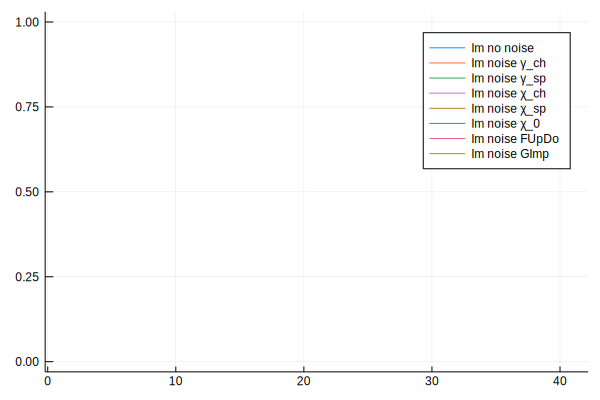

In [12]:
plot(imag(Σ_ladder[1,:]), label="Im no noise")
plot!(imag(Σ_Noise_01[1,:]), label="Im noise γ_ch")
plot!(imag(Σ_Noise_02[1,:]), label="Im noise γ_sp")
plot!(imag(Σ_Noise_03[1,:]), label="Im noise χ_ch")
plot!(imag(Σ_Noise_04[1,:]), label="Im noise χ_sp")
plot!(imag(Σ_Noise_05[1,:]), label="Im noise χ_0")
plot!(imag(Σ_Noise_06[1,:]), label="Im noise FUpDo")
plot!(imag(Σ_Noise_07[1,:]), label="Im noise GImp")

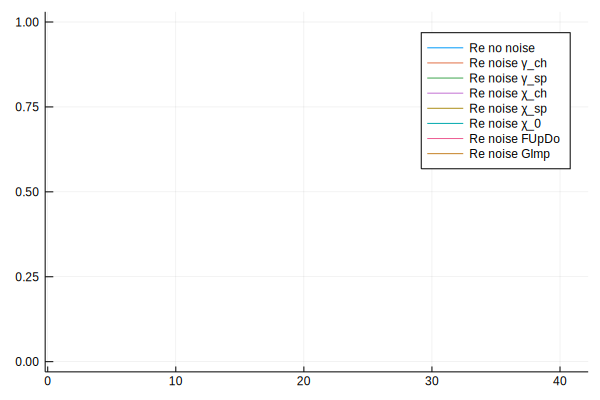

In [13]:
plot(real(Σ_ladder[1,:]), label="Re no noise")
plot!(real(Σ_Noise_01[1,:]), label="Re noise γ_ch")
plot!(real(Σ_Noise_02[1,:]), label="Re noise γ_sp")
plot!(real(Σ_Noise_03[1,:]), label="Re noise χ_ch")
plot!(real(Σ_Noise_04[1,:]), label="Re noise χ_sp")
plot!(real(Σ_Noise_05[1,:]), label="Re noise χ_0")
plot!(real(Σ_Noise_06[1,:]), label="Re noise FUpDo")
plot!(real(Σ_Noise_07[1,:]), label="Re noise GImp")

### Investigation of sum fits for $\Sigma$

The internal sums to compute $\Sigma$ are formally defined over infinitely many Matsubara frequencies.
We want to investigate the usefulness of the previously discussed methods in this context.

In [ ]:
include("src/GFFit.jl")
include("src/ladderDGATools.jl")
@time Σ_ladder = calc_DΓA_Σ(χch, χsp, trilexch, trilexsp, bubble, Σ_loc, FUpDo,
                    qMultiplicity, qGrid, kGrid, modelParams, simParams);
@time Σ_ladder_impr1,Σ_ladder_impr2,tmp = calc_DΓA_Σ_impr(χch, χsp, trilexch, trilexsp, bubble, Σ_loc, FUpDo,
                    qMultiplicity, qGrid, kGrid, modelParams, simParams);

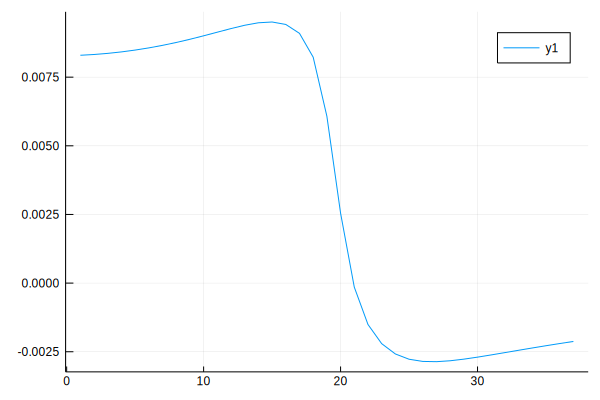

In [97]:
plot(real(tmp[:]))

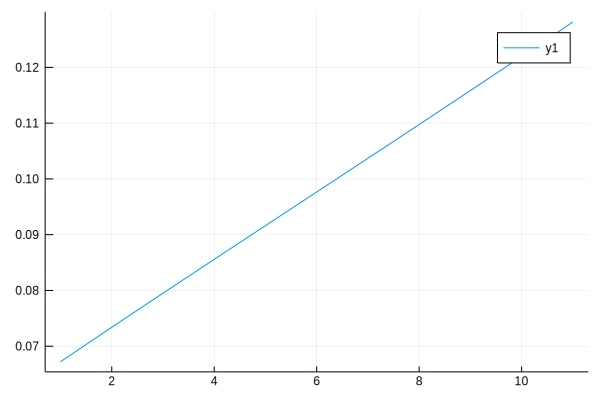

In [104]:
cut = 0
numin = Int(floor((length(tmp)-cut)*3/4))
numax = Int(floor(length(tmp))-cut)
W2 = build_weights(numin, numax, [0,1,2,3])
plot(real(build_fνmax(tmp, W2, [1])))

In [61]:
maximum(abs.(Σ_ladder_impr1 .- Σ_ladder_impr2))

5.184724718755054

In [37]:
size(Σ_ladder_impr2)

(40,)

In [106]:
size(Σ_ladder)

(55, 40)

In [107]:
println(maximum(abs.(Σ_ladder .- Σ_ladder_impr)))

4.204945466039917


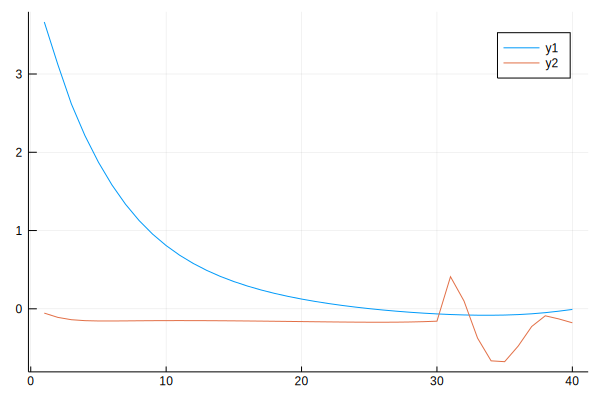

In [103]:
plot(real(Σ_ladder[end,:]))
plot!(real(Σ_ladder_impr[end,:]))

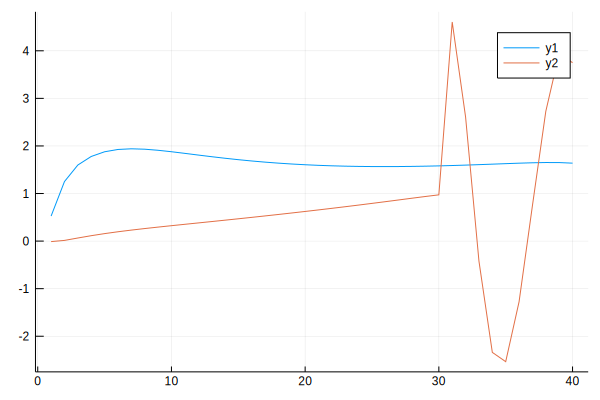

In [93]:
plot(imag(Σ_ladder[end,:]))
plot!(imag(Σ_ladder_impr[end,:]))

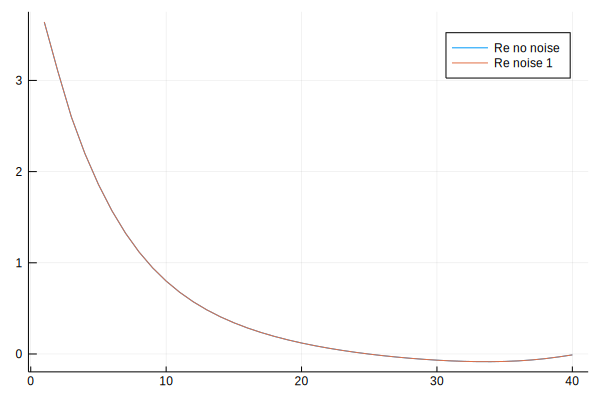

In [40]:
plot(real(Σ_ladder[1,:]), label="Re no noise")
plot!(real(Σ_Noise_01[1,:]), label="Re noise 1")

### Compare naive vs. fit

In [2]:
#plot(real(Σ_ladder[1,:]), label="Re naive")
plot(imag(Σ_ladder[1,:]), label="Im naive")
#plot!(real(Σ_ladder_impr[1,:]), label="Re χImpr Σnaive")
plot!(imag(Σ_ladder_impr[1,:]), label="Im χImpr Σnaive")

UndefVarError: UndefVarError: plot not defined

### Compare to $\Sigma_\text{loc}$